In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fs_923_df = pd.read_csv('../data/fs_sept_23.csv')
ce5_923_df = pd.read_csv('../data/ce5_sept_23.csv')
ce6_923_df = pd.read_csv('../data/ce6_sept_23.csv')

In [3]:
fs_923_df[(~fs_923_df['JOBID'].str.match(r'\d*_\d*')) & (fs_923_df['PARTITION'] == 'production') & 
          (fs_923_df['BEGIN'].str.match(r'2021-09-23T23'))].sort_values('BEGIN')

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
11149,32770708,COMPLETED,2021-09-23T23:16:09,2021-09-23T23:16:27,1024Mn,0,00:10:00,00:00:18,1,1,production,0:0
3696,32743129,COMPLETED,2021-09-23T23:17:47,2021-09-24T03:02:37,81920Mn,34262.15M,1-00:00:00,03:44:50,1,16,production,0:0
3697,32743130,COMPLETED,2021-09-23T23:24:38,2021-09-24T03:05:36,81920Mn,34349.76M,1-00:00:00,03:40:58,1,16,production,0:0
3698,32743131,COMPLETED,2021-09-23T23:24:48,2021-09-24T03:13:45,81920Mn,34311.73M,1-00:00:00,03:48:57,1,16,production,0:0
3699,32743132,COMPLETED,2021-09-23T23:31:15,2021-09-24T03:32:59,81920Mn,34303.85M,1-00:00:00,04:01:44,1,16,production,0:0
3700,32743133,COMPLETED,2021-09-23T23:32:15,2021-09-24T03:26:36,81920Mn,34350.48M,1-00:00:00,03:54:21,1,16,production,0:0
11150,32770709,COMPLETED,2021-09-23T23:36:03,2021-09-23T23:36:57,1024Mn,0,00:10:00,00:00:54,1,1,production,0:0
3701,32743134,COMPLETED,2021-09-23T23:36:54,2021-09-24T03:42:03,81920Mn,34349.14M,1-00:00:00,04:05:09,1,16,production,0:0
3702,32743135,COMPLETED,2021-09-23T23:37:03,2021-09-24T03:26:36,81920Mn,34293.84M,1-00:00:00,03:49:33,1,16,production,0:0
11153,32770723,COMPLETED,2021-09-23T23:38:03,2021-09-23T23:38:16,1024Mn,0,00:10:00,00:00:13,1,1,production,0:0


In [4]:
ce5_923_df[ce5_923_df['0'].str.match(r'2021-09-23 23')]

,0,1,2,3,4,5,6
95,2021-09-23 23:11:19.112877,user 9204,retry 0,time 2.624953269958496,returncode 0,command ['/usr/bin/sbatch','/tmp/condor_g_scratch.0x55df4d94e210.776217/...
96,2021-09-23 23:29:34.811749,user 9204,retry 0,time 20.04094672203064,returncode 1,command ['/usr/bin/sbatch','/tmp/condor_g_scratch.0x55df4789ba00.776217/...
97,2021-09-23 23:32:01.391829,user 9201,retry 0,time 20.16852045059204,returncode 1,command ['/usr/bin/sbatch','/tmp/condor_g_scratch.0x55df48f64540.776217/...
98,2021-09-23 23:41:37.837563,user 9204,retry 0,time 20.02840232849121,returncode 1,command ['/usr/bin/sbatch','/tmp/condor_g_scratch.0x55df4c1f42e0.776217/...
99,2021-09-23 23:59:32.065979,user 9204,retry 0,time 16.306732177734375,returncode 0,command ['/usr/bin/sbatch','/tmp/condor_g_scratch.0x55df4c116480.776217/...


In [5]:
ce6_923_df[ce6_923_df['0'].str.match(r'2021-09-23 23')]

,0,1,2,3,4,5,6
94,2021-09-23 23:14:18.558188,user 9204,retry 0,time 1.7164342403411865,returncode 0,command ['/usr/bin/sbatch','/tmp/condor_g_scratch.0x55b43d523870.2522340...
95,2021-09-23 23:26:32.991057,user 9204,retry 0,time 20.048691749572754,returncode 1,command ['/usr/bin/sbatch','/tmp/condor_g_scratch.0x55b43d147ba0.2522340...
96,2021-09-23 23:44:26.108585,user 9204,retry 0,time 6.029086351394653,returncode 0,command ['/usr/bin/sbatch','/tmp/condor_g_scratch.0x55b43d93e730.2522340...
97,2021-09-23 23:56:30.845851,user 9204,retry 0,time 8.153744459152222,returncode 0,command ['/usr/bin/sbatch','/tmp/condor_g_scratch.0x55b43d779890.2522340...


In [13]:
ce5_923_df['4'] = ce5_923_df['4'].str.extract(r'(\d)')
ce5_923_df = ce5_923_df.rename(columns={'4':'returncode'})
ce6_923_df['4'] = ce6_923_df['4'].str.extract(r'(\d)')
ce6_923_df = ce6_923_df.rename(columns={'4':'returncode'})

In [32]:
fs_923_df.head(3)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,32298471,CANCELLED,2021-09-18T16:06:53,2021-09-23T16:07:08,40960Mn,1444.08M,5-00:00:00,5-00:00:15,4,4,turing,0:15
1,32305950_243,COMPLETED,2021-09-23T00:44:26,2021-09-28T17:55:34,15360Mn,103.37M,14-00:00:00,5-17:11:08,1,1,production,0:0
2,32305950_244,COMPLETED,2021-09-23T01:29:29,2021-09-28T16:28:38,15360Mn,105.20M,14-00:00:00,5-14:59:09,1,1,production,0:0


In [45]:
begin_load_df = fs_923_df[fs_923_df['PARTITION'] == 'production']\
                    [['BEGIN', 'USEDMEM', 'CPUS']].rename(columns={'BEGIN':'TIME'})
begin_load_df['ACTION'] = 'begin'

end_load_df = fs_923_df[fs_923_df['PARTITION'] == 'production']\
                    [['END', 'USEDMEM', 'CPUS']].rename(columns={'END':'TIME'})
end_load_df['ACTION'] = 'end'

In [106]:
load_df = begin_load_df.append(end_load_df)
load_df = load_df[load_df['TIME'].str.match(r'2021-09-23')].sort_values('TIME')
load_df['USEDMEM'] = pd.to_numeric(load_df['USEDMEM'].str[:-1], errors='coerce')
load_df['CPUS'] = pd.to_numeric(load_df['CPUS'], errors='coerce')
load_df = load_df.fillna(0)

In [114]:
rows_lst = []
usedmem = 0
cpus = 0
for index, data in load_df.iterrows():
#     print(data.USEDMEM)
#     expression_if_true if condition else expression_if_false
    usedmem = usedmem + data.USEDMEM if data.ACTION == 'begin' else usedmem - data.USEDMEM
    cpus = cpus + data.CPUS if data.ACTION == 'begin' else cpus - data.CPUS
    rows_lst.append([data.TIME, usedmem, cpus])
accumulated_usage_df = pd.DataFrame(rows_lst)
accumulated_usage_df['0'] = pd.to_datetime(accumulated_usage_df[0], format='%Y-%m-%dT%H:%M:%S')

In [117]:
ce5_923_df['returncode'].sum()

'0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001101110'

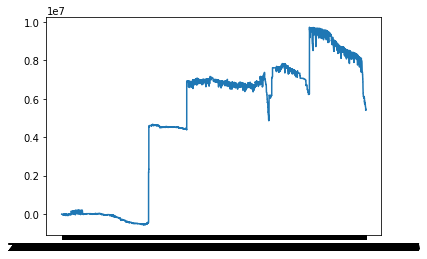

In [115]:
plt.plot(accumulated_usage_df[0], accumulated_usage_df[1])

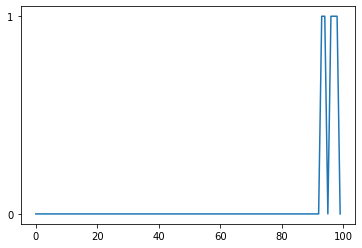

In [118]:
plt.plot(ce5_923_df['returncode'])

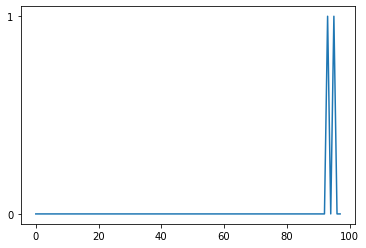

In [119]:
plt.plot(ce6_923_df['returncode'])